In [1]:
import matplotlib as plt

In [2]:
deck =list(range(1,52))
random.shuffle(deck)

NameError: name 'random' is not defined

In [3]:
type(deck)


list

In [4]:
import random
class Deck:
    def __init__(self):
        self.cards=list(range(1,52))
        random.shuffle(self.cards)
        
    def show(self):
        print (self.cards)
        
 

In [5]:
cards = Deck()
cards.show()

[7, 12, 51, 42, 9, 17, 21, 45, 2, 38, 43, 27, 26, 35, 40, 29, 37, 19, 15, 10, 41, 44, 20, 36, 25, 3, 6, 39, 5, 8, 49, 48, 47, 32, 24, 18, 11, 28, 30, 33, 13, 46, 31, 34, 50, 16, 1, 22, 4, 23, 14]


In [6]:
x = [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 17, 21]
y=Onehand(x,-1)
y.check()

NameError: name 'Onehand' is not defined

In [7]:
import random
class Onehand:
    def __init__(self,flop,pos):
        self.flop=flop
        self.pos=pos
        self.lastmatch = []
        
     
        
    
    
    
    
    
        
    def play(self,startpos,offset):
        self.lastmatch = []
        self.flop[offset]=self.flop[startpos]
        del self.flop[startpos]
        self.pos=offset
        
        
        
    def play_full(self):
        #print ('pos',self.pos)
        while self.pos <=-1:
            self.check()
            if len(self.lastmatch) >0:
                self.play(self.pos,self.pos+self.lastmatch[-1])
            if self.pos ==-1:
                break
            self.pos =self.pos +1
            #print ('add one')
                
        
        
    def check(self):
        self.lastmatch = []
        live_card = self.flop[self.pos]
        #print('livecard',live_card)
        for offset in [-3,-1,1,3]:
             
            try: 
                candidate_location = self.pos+offset
                if candidate_location >-1:
                    continue
                    print ('continue')
                else:
                  candidate = self.flop[self.pos+offset] 
                  
                  
                  if (live_card % 13 == candidate %13 ):
                        self.lastmatch.append(offset)
                        #print ("Card match",live_card % 13,candidate %13) 
                         
                        
                   
                
                  if (int( (live_card-1)/13) == int((candidate-1)/13)) :
                        self.lastmatch.append(offset)
                        #print ("Suit match",int( (live_card-1)/13),int((candidate-1)/13))  
                  
                        
                         
                     
            except IndexError:
                pass      
        

In [8]:
x=4
print (int( (x-1)/13))

print ( (x)%13)


0
4


In [9]:
a =Onehand([1,2,3,4,15,20,7],-1)
 
a.play_full()
print ('a',a.flop)
 
a.check()
print ('lastmatch',a.lastmatch)
#a.play(-1,-2)
print (a.flop) 
 

a [1, 2, 7, 15]
lastmatch []
[1, 2, 7, 15]


In [10]:
import unittest

class TestStuff(unittest.TestCase):
    def test_card_match(self):
        hand=Onehand([42, 20, 50, 51],-1)  
        hand.check()
        hand.play(-1,-2)
        print ('flop...',hand.flop)
        self.assertTrue(hand.flop==[42, 20, 51])
        
        
        hand=Onehand([49, 12, 22, 33, 43, 44],-1)  
        hand.check()
        hand.play(-1,-2)
        print ('flop...',hand.flop)
        self.assertTrue(hand.flop==[49, 12, 22, 33, 44])
        
    def test_CheckBasic(self):   
        hand=Onehand([1],-1)  
        self.assertTrue(len(hand.flop)==1)
        hand.check()
        self.assertTrue(hand.lastmatch==[])
        hand=Onehand([1,2],-1) 
        hand.check()
        self.assertTrue(hand.lastmatch==[-1])
        hand=Onehand([1,2],-1) 
        hand.check()
        self.assertTrue(hand.lastmatch==[-1])
        hand=Onehand([1,2,3,4],-1) 
        hand.check()
        #print (hand.lastmatch)
        self.assertTrue(hand.lastmatch==[-3,-1])
        
    def test_threes(self):  
        hand=Onehand([1,2,3,4,5,6,7,8,9],-4) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[-3,-1,1,3])
        hand=Onehand([9,2,3,20,5,6,7,8,9],-6) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[3])
        hand=Onehand([9,2,3,22,5,6,7,8,9],-9) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[1,3])
        
    def test_single_play(self):  
        hand=Onehand([1,2,9],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-2)
        
        print('after flop',hand.flop)
        self.assertTrue(hand.flop==[1,9])
        
        hand=Onehand([1,2,9,4,5],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-4)
        
        print('after flop..',hand.flop)
        self.assertTrue(hand.flop==[1,5,9,4])
        
        hand=Onehand([1,2,9,4,5,],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-4)
        hand.play(-1,-4)
        
        
        print('after flop..',hand.flop)
        self.assertTrue(hand.flop==[4,5,9])    
        
       
           
        
        
        
if __name__ == "__main__":
    
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    



....

flop... [42, 20, 51]
flop... [49, 12, 22, 33, 44]
hand before [1, 2, 9]
after flop [1, 9]
hand before [1, 2, 9, 4, 5]
after flop.. [1, 5, 9, 4]
hand before [1, 2, 9, 4, 5]
after flop.. [4, 5, 9]
hand match [-3, -1, 1, 3]
hand match [3]
hand match [1, 3]



----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


In [11]:

class one_iteration:
    def __init__(self):
        self.total_hands=0
        self.length_dist = {}
        
    def play(self):
        total_iterations = 0
        y=2
        res={}

        while y >1:
          total_iterations=total_iterations+1  
          cards = Deck()
          hand=Onehand([],-1)
          count = 0


          for x in  cards.cards:
                   hand.flop.append(x)
     
                   hand.check()
                   if len(hand.lastmatch) >0:    
                        hand.play_full()
                        count=count+1
    
          #print ('count of final flop',len(hand.flop),hand.flop)  
          y=len(hand.flop)
          res[y]= res.get(y, 0)+1
          
 
        print ('total before win',total_iterations)    
        self.length_dist = res
        self.total_hands =total_iterations
    

In [17]:
reslist = []
for x in  range(1,1000):
    
    a=one_iteration()
    a.play()
    reslist.append(a.total_hands)
    print (reslist)
    print('average lenght',sum(reslist)/len(reslist))

total before win 1127
[1127]
average lenght 1127.0
total before win 1552
[1127, 1552]
average lenght 1339.5
total before win 7482
[1127, 1552, 7482]
average lenght 3387.0
total before win 838
[1127, 1552, 7482, 838]
average lenght 2749.75
total before win 901
[1127, 1552, 7482, 838, 901]
average lenght 2380.0
total before win 2521
[1127, 1552, 7482, 838, 901, 2521]
average lenght 2403.5
total before win 4857
[1127, 1552, 7482, 838, 901, 2521, 4857]
average lenght 2754.0
total before win 3206
[1127, 1552, 7482, 838, 901, 2521, 4857, 3206]
average lenght 2810.5
total before win 2970
[1127, 1552, 7482, 838, 901, 2521, 4857, 3206, 2970]
average lenght 2828.222222222222
total before win 4746
[1127, 1552, 7482, 838, 901, 2521, 4857, 3206, 2970, 4746]
average lenght 3020.0
total before win 282
[1127, 1552, 7482, 838, 901, 2521, 4857, 3206, 2970, 4746, 282]
average lenght 2771.090909090909
total before win 1577
[1127, 1552, 7482, 838, 901, 2521, 4857, 3206, 2970, 4746, 282, 1577]
average lengh

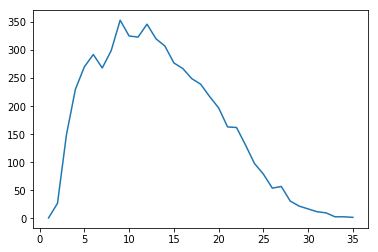

NameError: name 'res' is not defined

In [13]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


lists = sorted(a.length_dist.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()
print ('total number or hands',len(res))
print ('total before win',total_iterations) 

(array([19., 11.,  7.,  7.,  3.,  4.,  5.,  4.,  1.,  2.,  4.,  2.,  1.,
         3.,  2.,  2.,  5.,  3.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,
         2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([   87.  ,   417.42,   747.84,  1078.26,  1408.68,  1739.1 ,
         2069.52,  2399.94,  2730.36,  3060.78,  3391.2 ,  3721.62,
         4052.04,  4382.46,  4712.88,  5043.3 ,  5373.72,  5704.14,
         6034.56,  6364.98,  6695.4 ,  7025.82,  7356.24,  7686.66,
         8017.08,  8347.5 ,  8677.92,  9008.34,  9338.76,  9669.18,
         9999.6 , 10330.02, 10660.44, 10990.86, 11321.28, 11651.7 ,
        11982.12, 12312.54, 12642.96, 12973.38, 13303.8 , 13634.22,
        13964.64, 14295.06, 14625.48, 14955.9 , 15286.32, 15616.74,
        15947.16, 16277.58, 16608.  ]),
 <a list of 50 Patch objects>)

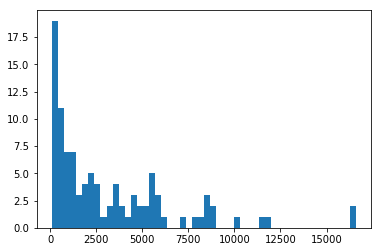

In [16]:
plt.hist(reslist,bins=50)

In [14]:
res={}
res['1']=0
print (cards.cards)
hold=[]
for x in cards.cards:
    hold.append(x)
    y=Onehand(hold,-1)
    y.check()
    print('________')
    print('flop',y.flop, '   x',x) 
    print ('last match',y.lastmatch)
    
    while len(y.lastmatch)>0:
      print ('play pos',y.pos) 
      print ('play lastmatch',y.lastmatch) 
      y.play(y.pos,y.lastmatch[0])   
    print('________')   
print (hold)    
 
 

[7, 12, 51, 42, 9, 17, 21, 45, 2, 38, 43, 27, 26, 35, 40, 29, 37, 19, 15, 10, 41, 44, 20, 36, 25, 3, 6, 39, 5, 8, 49, 48, 47, 32, 24, 18, 11, 28, 30, 33, 13, 46, 31, 34, 50, 16, 1, 22, 4, 23, 14]
________
flop [7]    x 7
last match []
________
________
flop [7, 12]    x 12
last match [-1]
play pos -1
play lastmatch [-1]
________
________
flop [7, 51]    x 51
last match []
________
________
flop [7, 51, 42]    x 42
last match [-1]
play pos -1
play lastmatch [-1]
________
________
flop [7, 51, 9]    x 9
last match []
________
________
flop [7, 51, 9, 17]    x 17
last match []
________
________
flop [7, 51, 9, 17, 21]    x 21
last match [-1]
play pos -1
play lastmatch [-1]
________
________
flop [7, 51, 9, 17, 45]    x 45
last match [-3]
play pos -1
play lastmatch [-3]
________
________
flop [7, 51, 45, 17, 2]    x 2
last match []
________
________
flop [7, 51, 45, 17, 2, 38]    x 38
last match []
________
________
flop [7, 51, 45, 17, 2, 38, 43]    x 43
last match [-3]
play pos -1
play l

In [103]:
a.faceup[1900]

NameError: name 'a' is not defined

[-1, -3, 1, 3]


In [109]:
3 %13

3

In [110]:
16 %13

3